In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/TIME SERIES ELEC.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
df.rename(columns={'IPG2211A2N': 'production'}, inplace=True)
df.head()

,DATE,production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [7]:
df.reset_index(inplace=True)

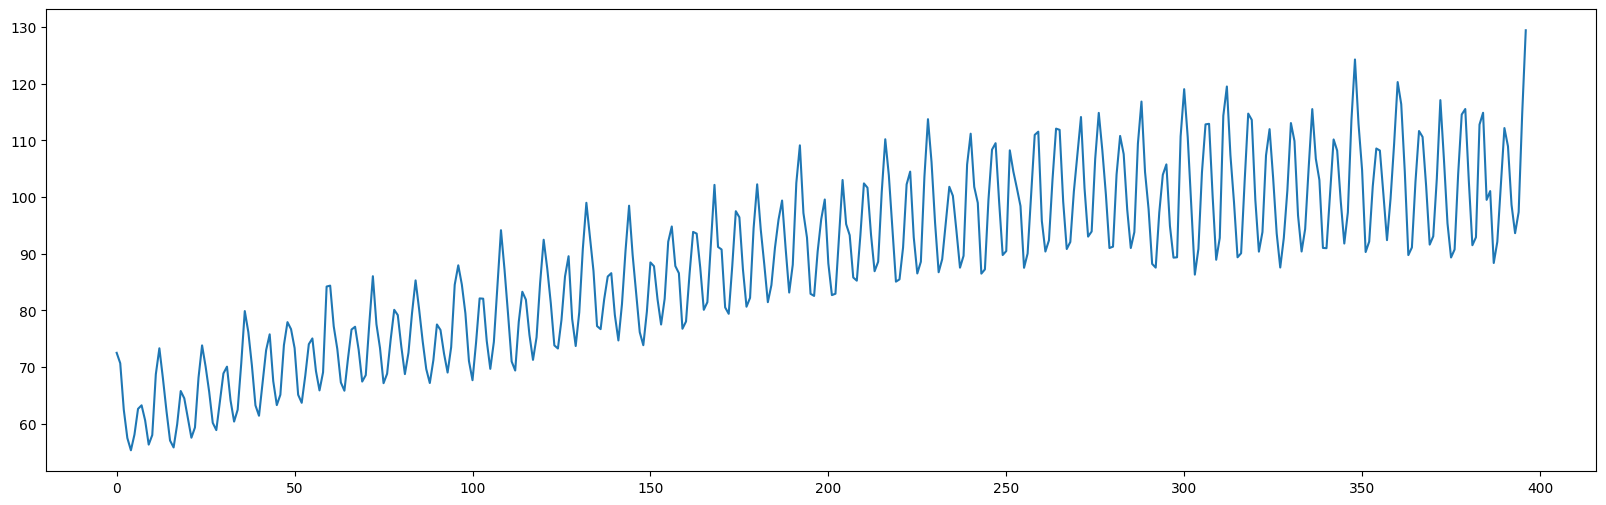

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (20,6)})
plt.plot(df['production'])

### **DECOMPOSITION OF TIME SERIES**

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt

# Multiplicative Decomposition
mul_result = seasonal_decompose(df['production'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(df['production'], model='additive',period=1)


Text(0.5, 0.98, '\nMultiplicative Decompose')

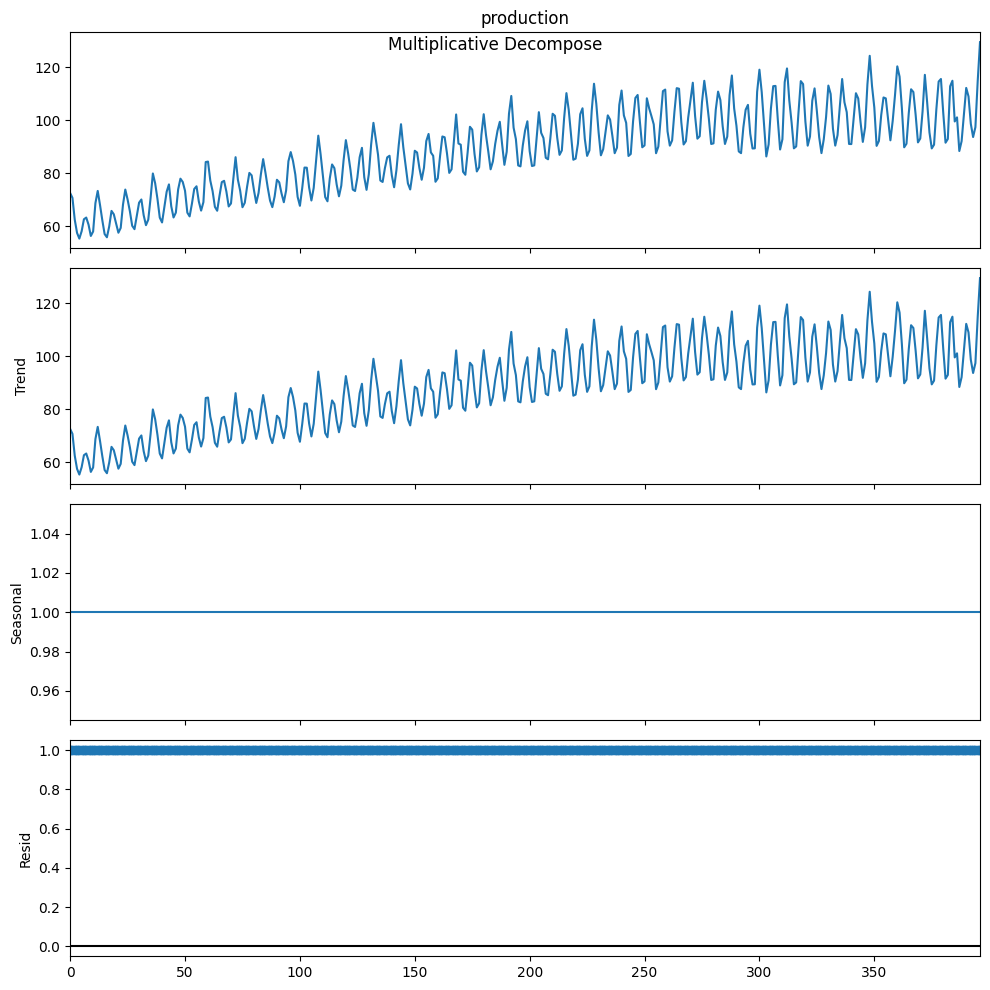

In [10]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

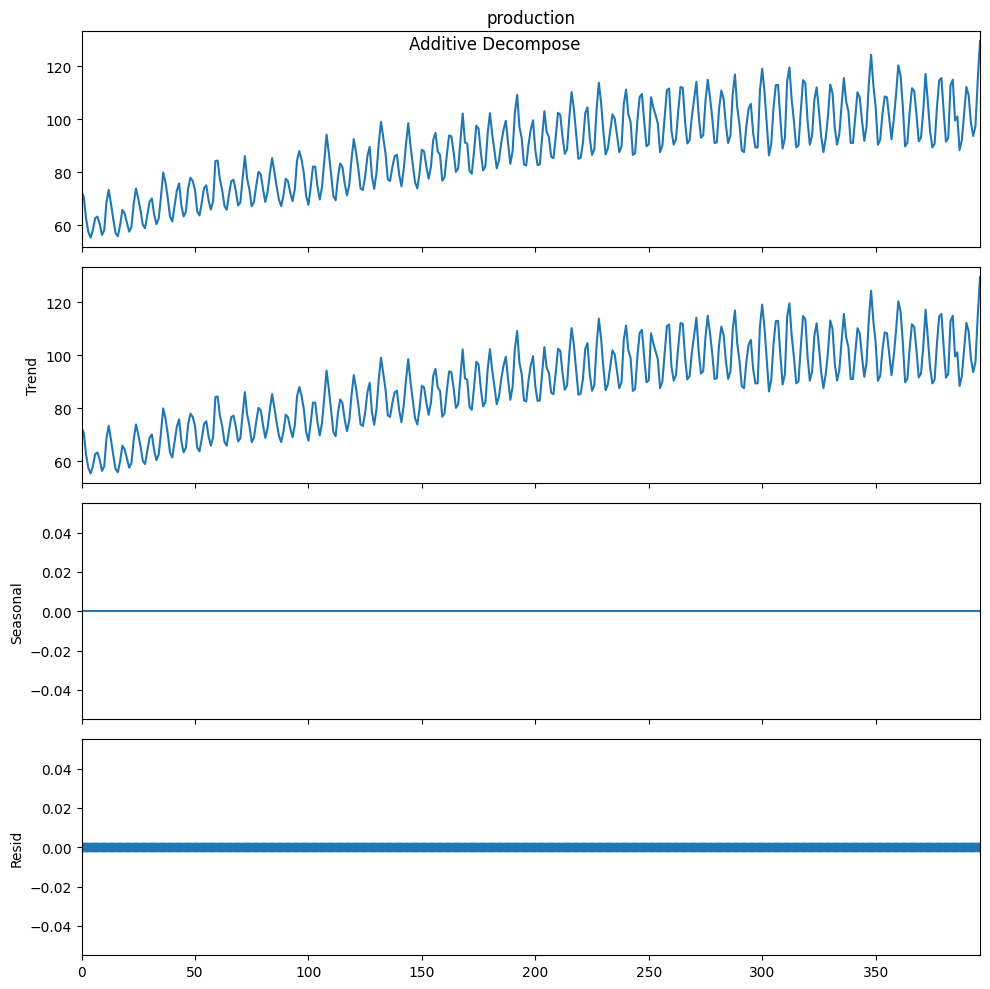

In [11]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

In [12]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
0,1.0,72.5052,1.0,72.5052
1,1.0,70.6720,1.0,70.6720
2,1.0,62.4502,1.0,62.4502
3,1.0,57.4714,1.0,57.4714
4,1.0,55.3151,1.0,55.3151


In [13]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
0,0.0,72.5052,0.0,72.5052
1,0.0,70.6720,0.0,70.6720
2,0.0,62.4502,0.0,62.4502
3,0.0,57.4714,0.0,57.4714
4,0.0,55.3151,0.0,55.3151


## **Detrend a Time Series**

Text(0.5, 1.0, 'production detrended by subtracting the least squares fit')

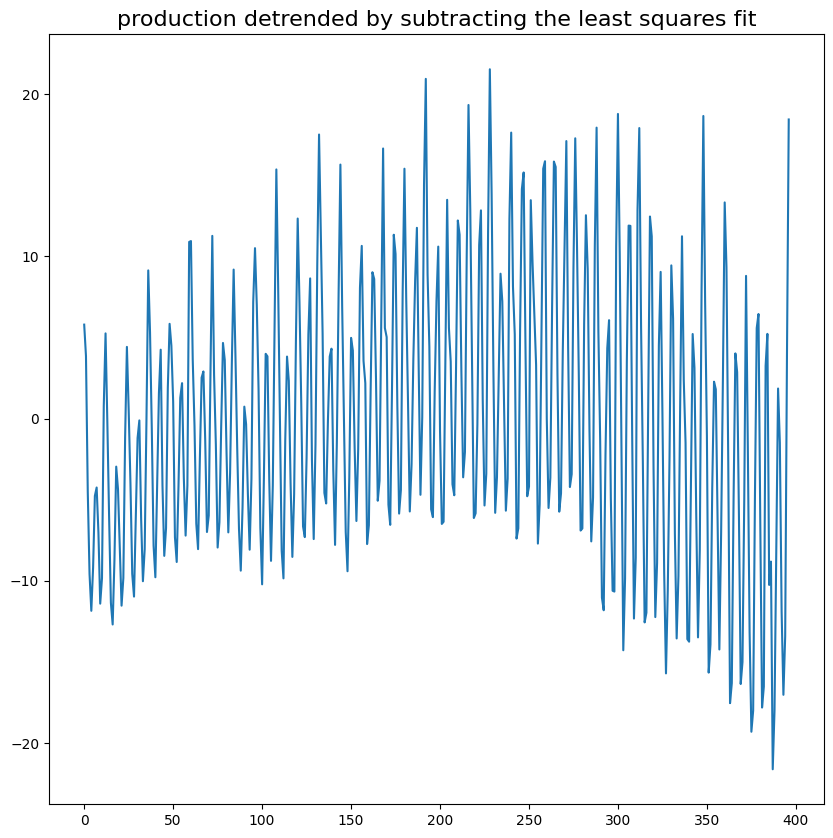

In [14]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['production'].values)
plt.plot(detrended)
plt.title('production detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'production detrended by subtracting the trend component')

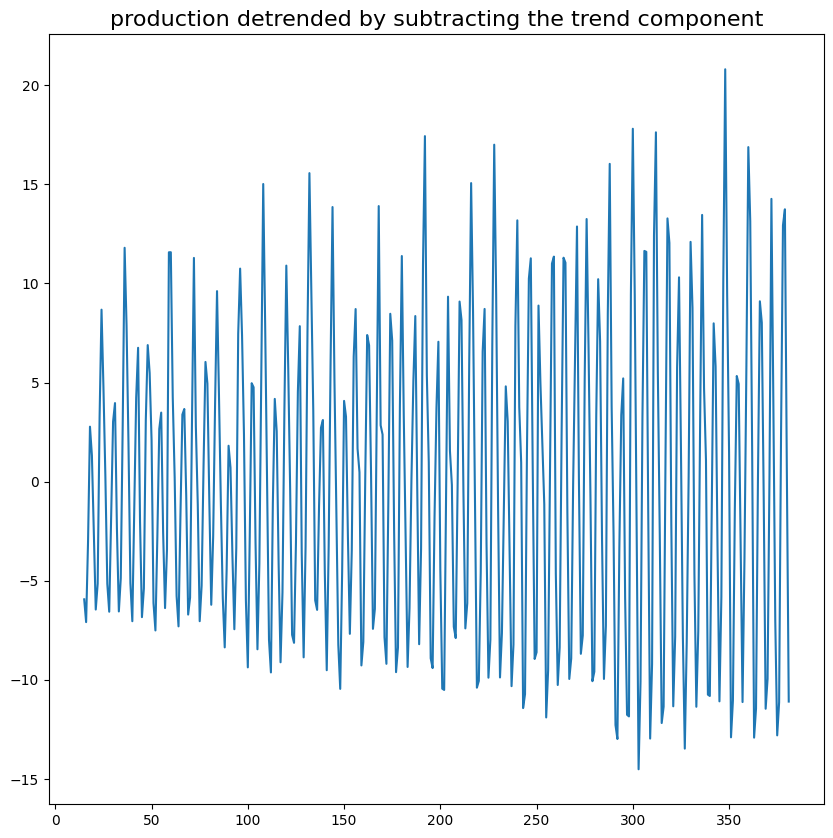

In [15]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['production'], model='multiplicative', period=30)
detrended = df['production'].values - result_mul.trend
plt.plot(detrended)
plt.title('production detrended by subtracting the trend component', fontsize=16)

## **Deseasonalize a Time Series**

[]

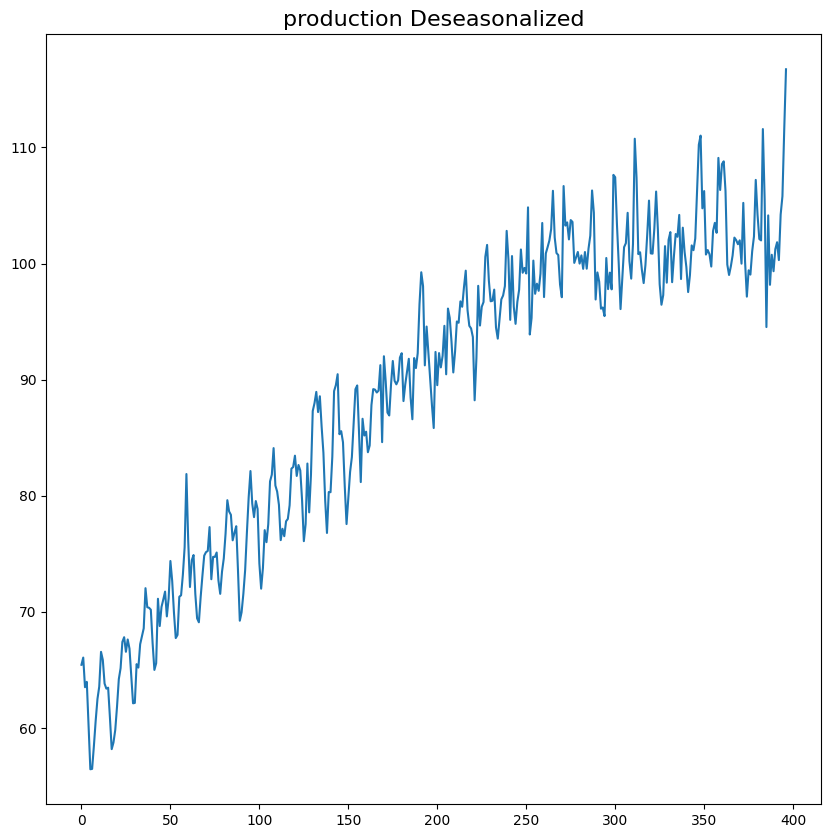

In [16]:
# Subtracting the Trend Component
# Time Series Decomposition
result_mul = seasonal_decompose(df['production'], model='multiplicative', period=30)
# Deseasonalize
deseasonalized = df['production'].values / result_mul.seasonal
# Plot
plt.plot(deseasonalized)
plt.title('production Deseasonalized', fontsize=16)
plt.plot()

### **Making time series stationary**

### **ADFULLER TEST FOR STATIONARITY**

In [17]:
from statsmodels.tsa.stattools import adfuller
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(df.production.values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critial Values:
   1%, -3.4476305904172904
Critial Values:
   5%, -2.869155980820355
Critial Values:
   10%, -2.570827146203181


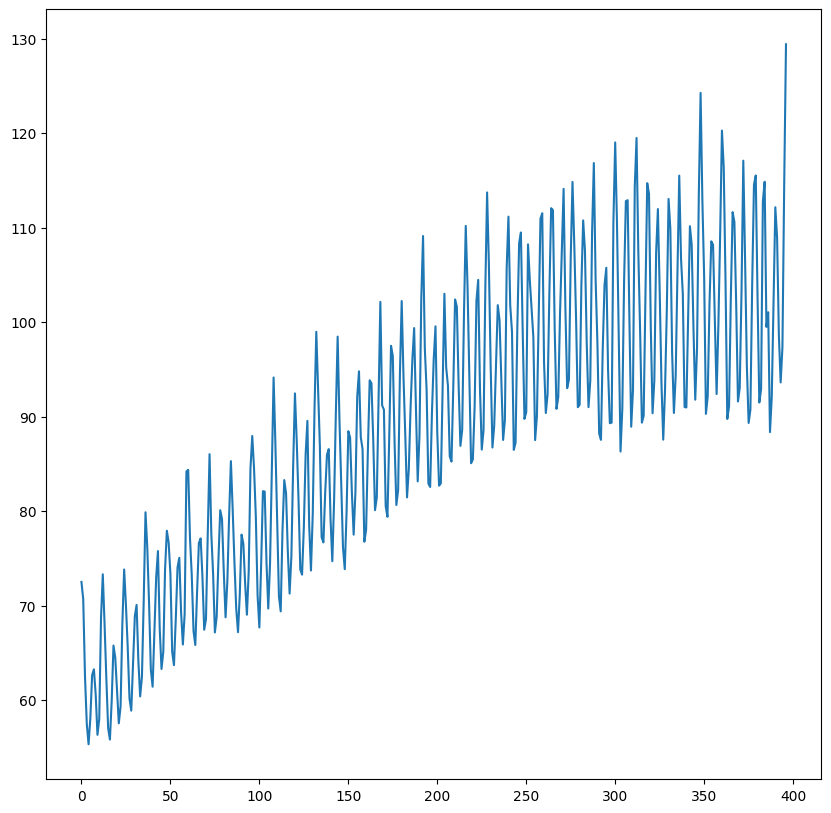

In [18]:
plt.plot(df['production'])

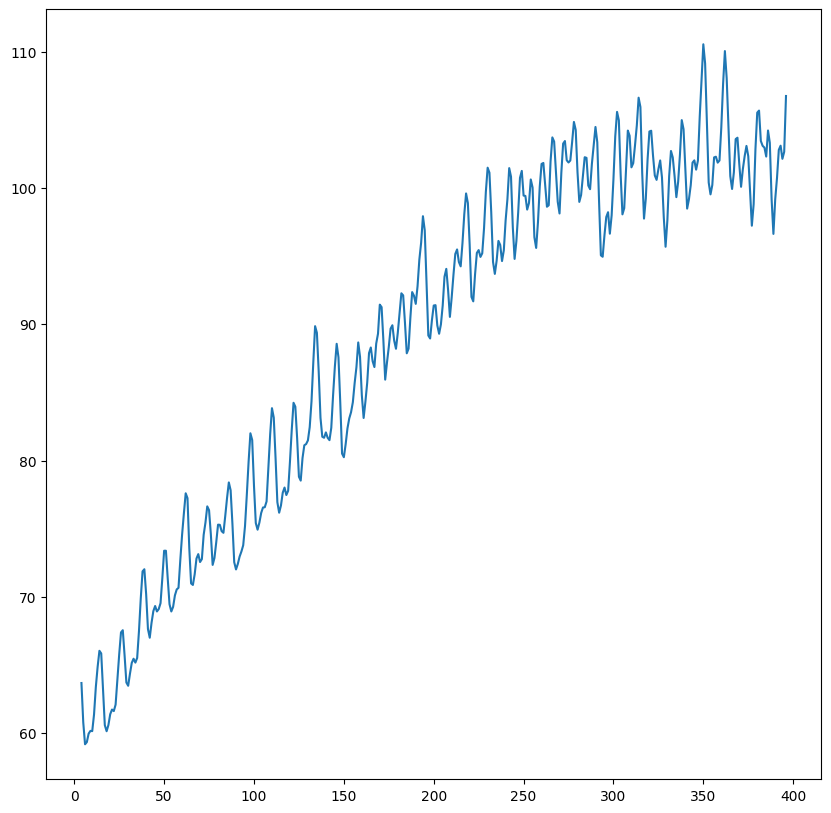

In [19]:
window_size = 5  # You can adjust this size as needed

# Calculate the moving average
df['moving_average'] = df['production'].rolling(window=window_size).mean()

# Plot the original time series and the moving average
plt.plot(df['moving_average'])

## **Method 1- Differencing and Seasonal differencing**

### **log operation**

In [20]:
import numpy as np
df['log_production'] = np.log(df['moving_average'])

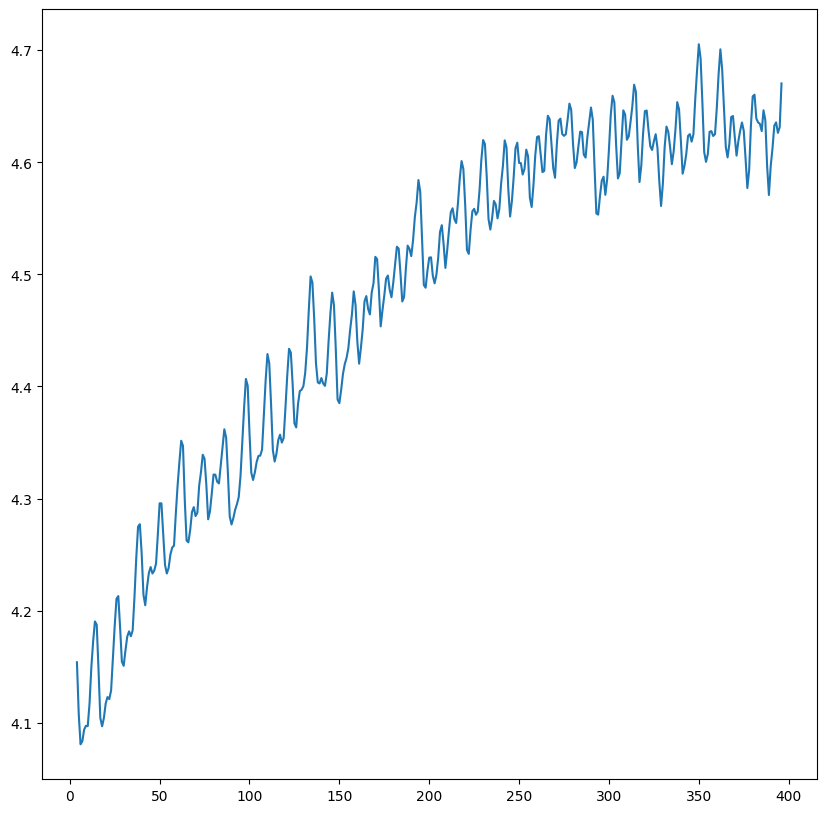

In [21]:
plt.plot(df['log_production'])

In [22]:
df.head()

,index,DATE,production,moving_average,log_production
0,0,1/1/1985,72.5052,NaN,NaN
1,1,2/1/1985,70.6720,NaN,NaN
2,2,3/1/1985,62.4502,NaN,NaN
3,3,4/1/1985,57.4714,NaN,NaN
4,4,5/1/1985,55.3151,63.68278,4.153914


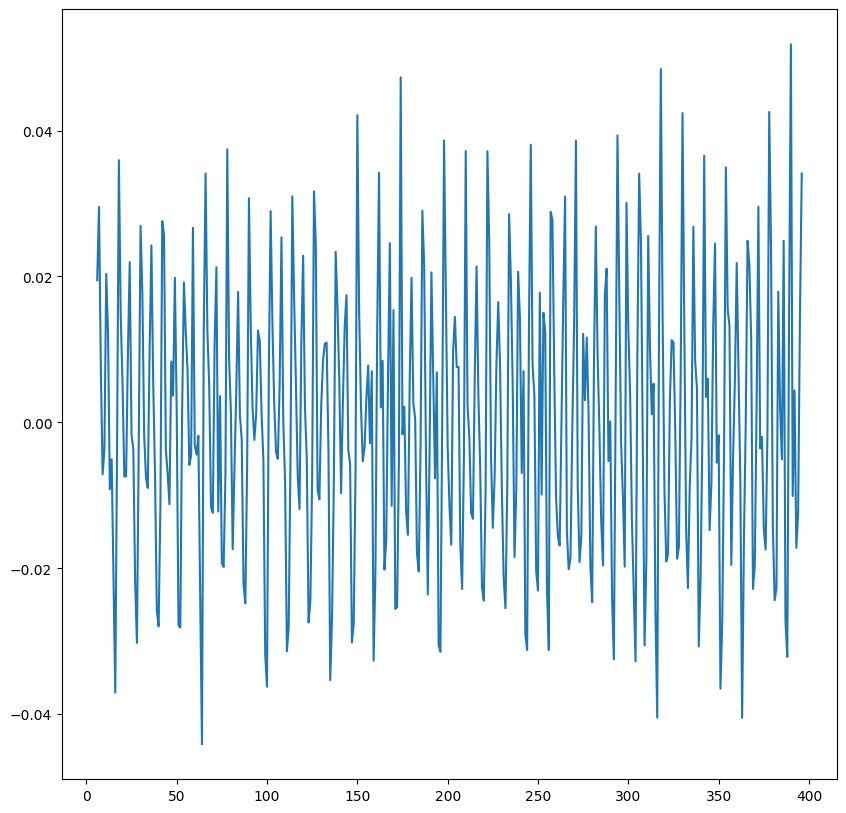

In [23]:
df['differenced_series'] = df['log_production']

# Perform differencing 10 times
num_differences = 2

for i in range(num_differences):
    # Apply differencing
    df['differenced_series'] = df['differenced_series'].diff()

    # Drop any NaN values that result from differencing
    df['differenced_series'].dropna(inplace=True)

plt.plot(df['differenced_series'])

In [24]:
df.head()

,index,DATE,production,moving_average,log_production,differenced_series
0,0,1/1/1985,72.5052,NaN,NaN,NaN
1,1,2/1/1985,70.6720,NaN,NaN,NaN
2,2,3/1/1985,62.4502,NaN,NaN,NaN
3,3,4/1/1985,57.4714,NaN,NaN,NaN
4,4,5/1/1985,55.3151,63.68278,4.153914,NaN


## **ACF**

<Figure size 1200x600 with 0 Axes>

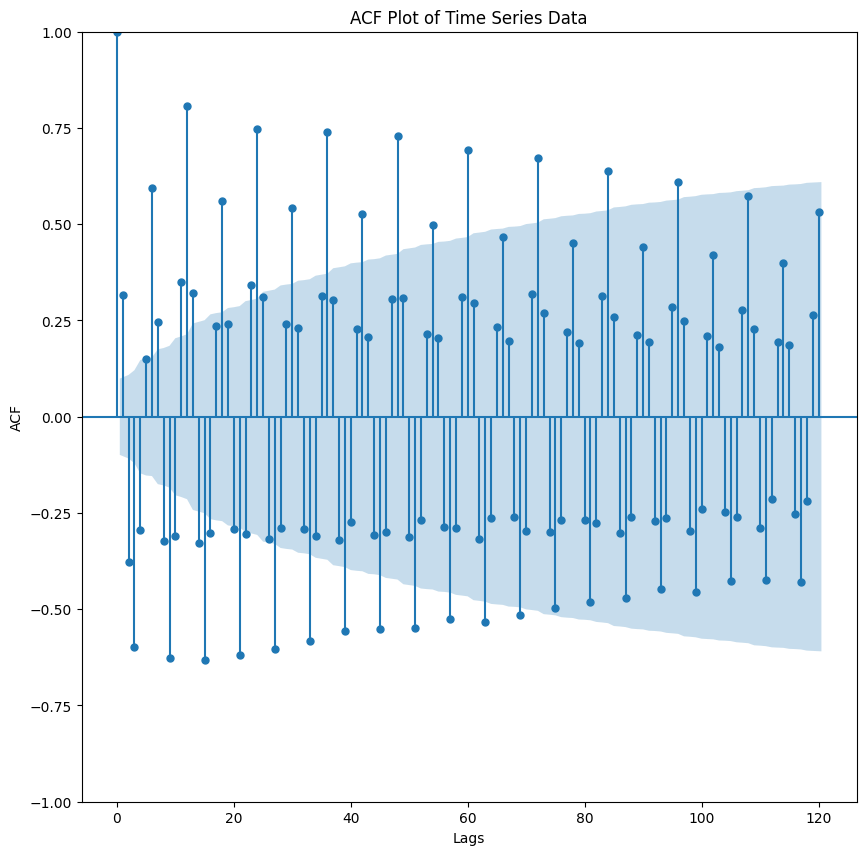

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['differenced_series'].dropna(), lags=120)

plt.title('ACF Plot of Time Series Data')
plt.xlabel('Lags')
plt.ylabel('ACF')

# Show the plot
plt.show()

In [26]:
df['differenced_series'].corr(df['differenced_series'].shift(1))

0.3176400230060544

### **PACF**

<Figure size 1200x600 with 0 Axes>

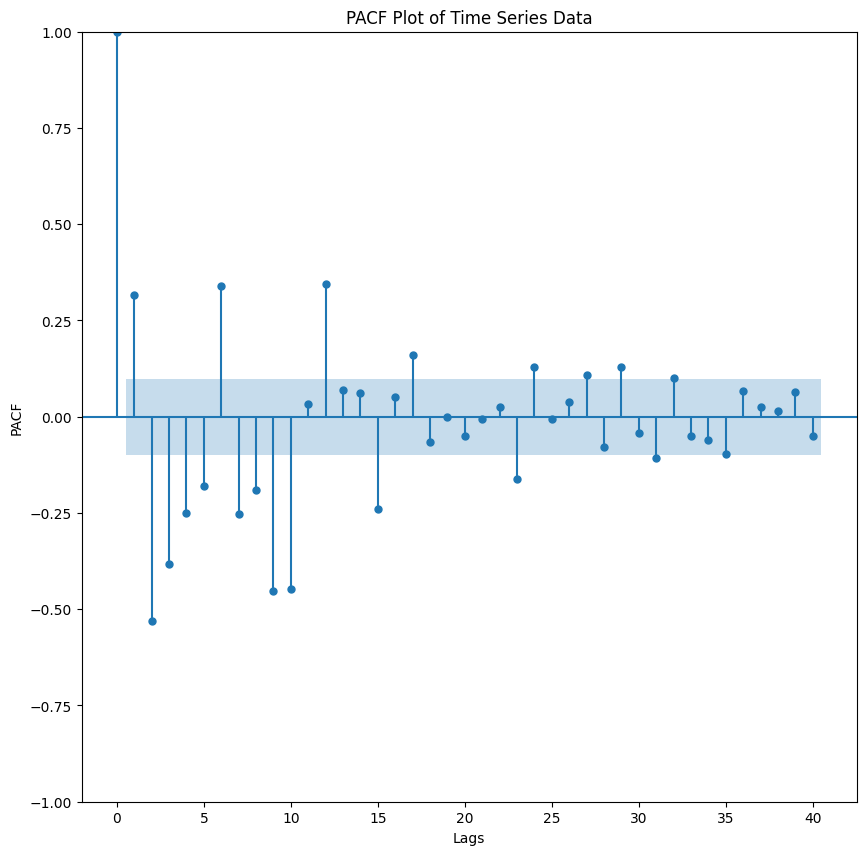

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(df['differenced_series'].dropna(), lags=40)

plt.title('PACF Plot of Time Series Data')
plt.xlabel('Lags')
plt.ylabel('PACF')

# Show the plot
plt.show()

In [28]:
adf_result = adfuller(df['differenced_series'].dropna())

# Extract and print the ADF test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -7.753096943815237
p-value: 9.89974656198546e-12
Critical Values:
   1%: -3.4479562840494475
   5%: -2.869299109917524
   10%: -2.57090345105665


In [29]:
from statsmodels.tsa.ar_model import AutoReg
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train = df['production'][:split_index]  # First 80% for training
test = df['production'][split_index:]   # Remaining 20% for testing

# Step 2: Fit an AR model with a lag of 10 on the training set
lag = 32
model = AutoReg(train, lags=lag)
model_fitted = model.fit()

# Print the model summary
print(model_fitted.summary())

                            AutoReg Model Results                             
Dep. Variable:             production   No. Observations:                  317
Model:                    AutoReg(32)   Log Likelihood                -637.359
Method:               Conditional MLE   S.D. of innovations              2.265
Date:                Tue, 28 Jan 2025   AIC                           1342.717
Time:                        04:54:14   BIC                           1466.902
Sample:                            32   HQIC                          1392.500
                                  317                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8817      1.310      2.962      0.003       1.313       6.450
production.L1      0.5656      0.059      9.538      0.000       0.449       0.682
production.L2     -0.1305      0.068

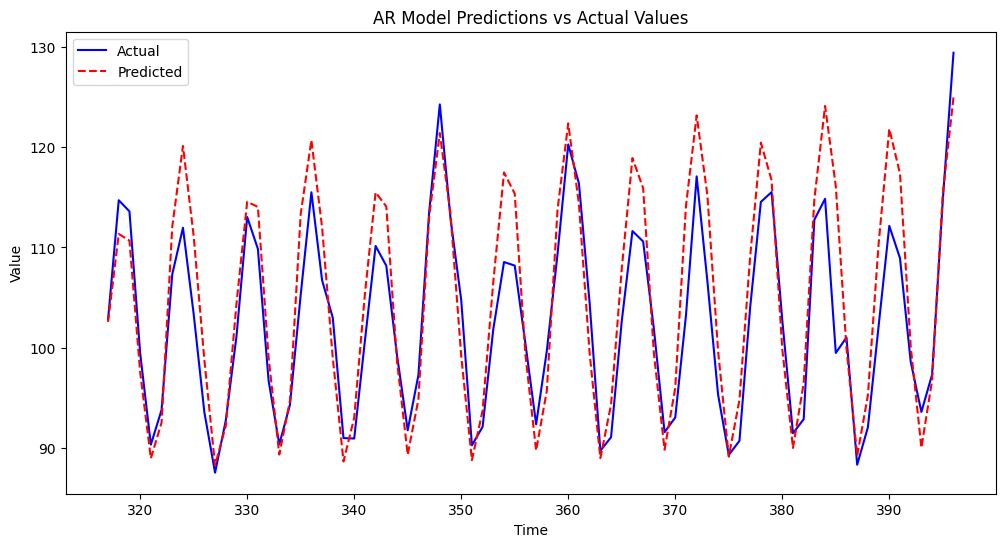

In [30]:
predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1)

# Step 4: Plot the actual values vs. the predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('AR Model Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

threshold = 0.05  # For example, 5% tolerance

# Calculate the absolute percentage error
percentage_errors = np.abs((test - predictions) / test)

# Count how many predictions fall within the threshold
correct_predictions = np.sum(percentage_errors <= threshold)

# Calculate the accuracy as the percentage of correct predictions
accuracy = correct_predictions / len(test) * 100

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 76.25%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  317
Model:               ARIMA(32, 3, 15)   Log Likelihood                -753.300
Date:                Tue, 28 Jan 2025   AIC                           1602.600
Time:                        04:55:07   BIC                           1782.571
Sample:                             0   HQIC                          1674.513
                                - 317                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8219      0.240     -7.594      0.000      -2.292      -1.352
ar.L2         -2.1864      0.273     -8.012      0.000      -2.721      -1.652
ar.L3         -2.3633      0.395     -5.984      0.0

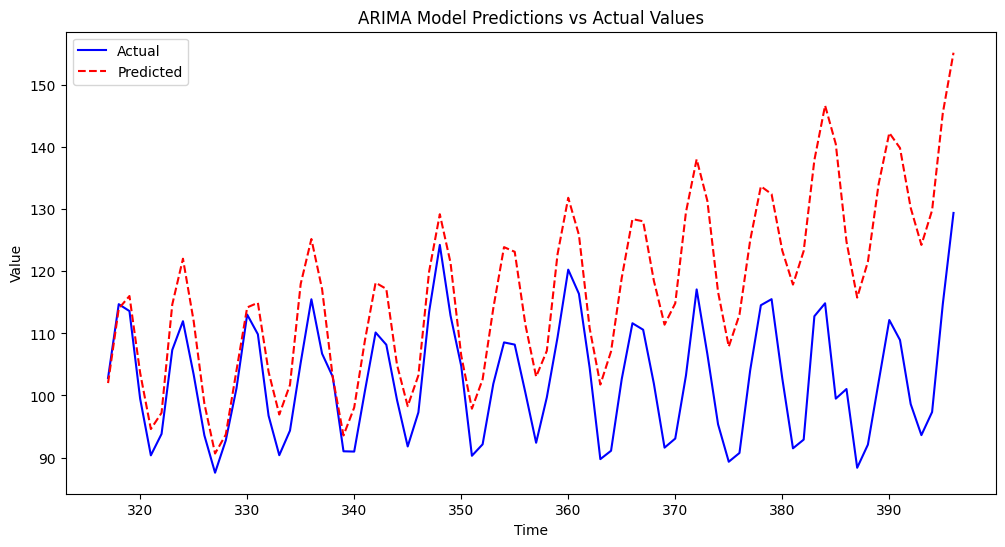

In [32]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(32, 3, 15))
model_fitted = model.fit()

# Print the model summary
print(model_fitted.summary())

# Step 3: Make predictions using the fitted model
# We'll forecast the length of the test set
predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1)

# Step 4: Plot the actual values vs. the predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

threshold = 0.05  # For example, 5% tolerance

# Calculate the absolute percentage error
percentage_errors = np.abs((test - predictions) / test)

# Count how many predictions fall within the threshold
correct_predictions = np.sum(percentage_errors <= threshold)

# Calculate the accuracy as the percentage of correct predictions
accuracy = correct_predictions / len(test) * 100

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 18.75%
